In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#1. Задание
#2)	Напишите код на Python, реализующий расчет длины вектора, заданного его координатами. (в программе)
#Вводим координаты X, Y, Z
x = float(input('X = '))
y = float(input('Y = '))
z = float(input('Z = '))
 
#Вычисляем длину вектора
lvec = np.sqrt(x * x + y * y + z * z)
 
#Выводим результат
print('Длина вектора = ', lvec)

X = 1
Y = 2
Z = 3
Длина вектора =  3.7416573867739413


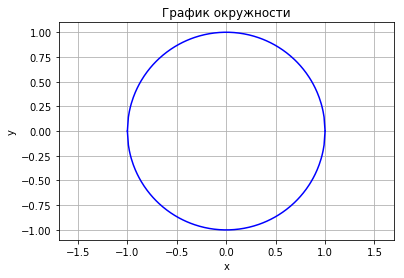

In [3]:
#3. Задание (в программе)
#Напишите код на Python, реализующий построение графиков:
#1.	окружности,
#2.	эллипса,
#3.	гиперболы.
#Создадим график окружности
R = 1
x=np.linspace(-R,R,201)
y=np.sqrt(R**2-x**2)

plt.plot(x, y, "blue")
plt.plot(x, -y, "blue")
plt.title("График окружности")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-R*2,R*2)
plt.ylim(-R*2,R*2)
plt.grid(True)
plt.axis('equal')
plt.show()

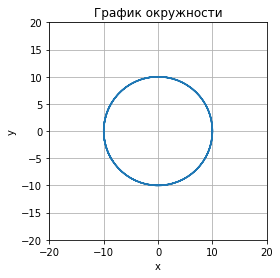

In [15]:
#другой способ построить окружность
R = 10
x=np.linspace(-R,R,201)
plt.plot(R*np.cos(x), R*np.sin(x))
plt.axes().set_aspect(1)
plt.title("График окружности")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-R*2,R*2)
plt.ylim(-R*2,R*2)
plt.grid(True)
plt.show()

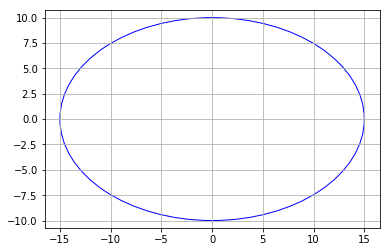

In [4]:
#Эллипс
from matplotlib.patches import Ellipse
import matplotlib as mpl

center = [0 , 0]
width = 30
height = 20
ell = mpl.patches.Ellipse(xy=center, width=width, height=height, fill=False, color='blue')
fig, ax = plt.subplots()

ax.add_patch(ell)
ax.set_aspect('equal')
ax.autoscale()
plt.grid(True)
plt.axis('equal')
plt.show()

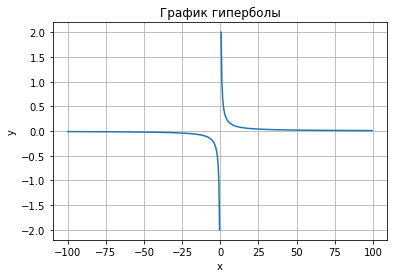

In [5]:
#Гипербола
xmin = -100
xmax = 100
dx = 0.5

x = np.arange(xmin, xmax, dx)

y = 1 / x
plt.grid(True)
plt.title("График гиперболы")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.show()

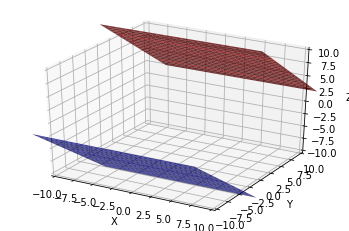

In [18]:
#5. Задание (в программе)
#1)	Нарисуйте трехмерный график двух параллельных плоскостей.
#2)	Нарисуйте трехмерный график двух любых поверхностей второго порядка.
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from pylab import meshgrid,linspace,zeros,dot,norm,cross,vstack,array,matrix,sqrt

def rotmatrix(axis,costheta):
    x,y,z = axis
    c = costheta
    s = sqrt(1-c*c)
    C = 1-c
    return  matrix([[ x*x*C+c,    x*y*C-z*s,  x*z*C+y*s ],
                    [ y*x*C+z*s,  y*y*C+c,    y*z*C-x*s ],
                    [ z*x*C-y*s,  z*y*C+x*s,  z*z*C+c   ]])

def plane(Lx,Ly,Nx,Ny,n,d):
    x = linspace(-Lx/2,Lx/2,Nx)
    y = linspace(-Ly/2,Ly/2,Ny)
    X,Y = meshgrid(x,y)
    Z   = zeros([Nx,Ny])
    n0 = array([0,0,1])
    if any(n0!=n):
        costheta = dot(n0,n)/(norm(n0)*norm(n))
        axis     = cross(n0,n)/norm(cross(n0,n))
        rotMatrix = rotmatrix(axis,costheta)
        XYZ = vstack([X.flatten(),Y.flatten(),Z.flatten()])
        X,Y,Z = array(rotMatrix*XYZ).reshape(3,Nx,Ny)

    dVec = (n/norm(n))*d
    X,Y,Z = X+dVec[0],Y+dVec[1],Z+dVec[2]
    return X,Y,Z


if __name__ == "__main__":
    Nplanes = 2
    colorList = cm.jet(linspace(0,1,Nplanes))
    distList = linspace(-10,10,Nplanes)
    normalVector = array([0,1,1])
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    for i,ypos in enumerate(linspace(-10,10,Nplanes)):
        X,Y,Z = plane(20,20,100,100,normalVector,distList[i])
        ax.plot_surface(X, Y, Z, rstride=5, cstride=5,
                        alpha=0.8, color=colorList[i])
    ax.set_xlabel('X')
    ax.set_xlim(-10, 10)
    ax.set_ylabel('Y')
    ax.set_ylim(-10, 10)
    ax.set_zlabel('Z')
    ax.set_zlim(-10, 10)

    plt.show()

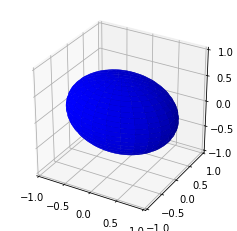

In [16]:
#Эллипсоид
fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.add_subplot(111, projection='3d')
coefs = (1, 2, 2)
rx, ry, rz = 1/np.sqrt(coefs)
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = rx * np.outer(np.cos(u), np.sin(v))
y = ry * np.outer(np.sin(u), np.sin(v))
z = rz * np.outer(np.ones_like(u), np.cos(v))
ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b')
max_radius = max(rx, ry, rz)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))
plt.show()

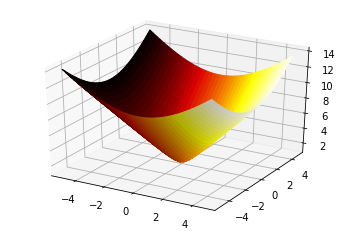

In [17]:
#Гиперболоид
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sqrt(4.*(X**2 + Y**2)/1. + 1)
xcolors = X - min(X.flat)
xcolors = xcolors/max(xcolors.flat)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.hot(xcolors),
    linewidth=1)
plt.show()

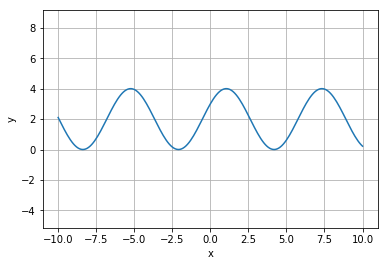

In [21]:
#1. Задание (в программе)
#Нарисуйте график функции:
#y(x) = k∙cos(x – a) + b
#для некоторых (2-3 различных) значений параметров k, a, b
k=2
a=np.pi/3
b=2
x=np.linspace(-10,10,201)
y=k*np.cos(x-a)+b
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis('equal')
plt.show()

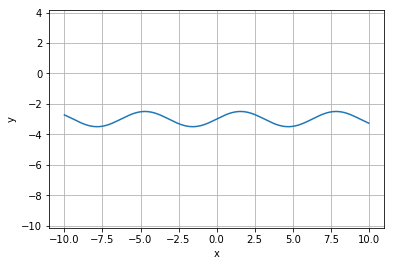

In [22]:
k=1.0/2.0
a=np.pi/2
b=-3
x=np.linspace(-10,10,201)
y=k*np.cos(x-a)+b
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis('equal')
plt.show()

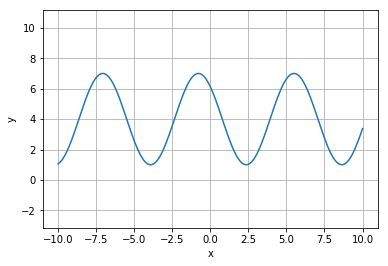

In [23]:
k=3
a=-np.pi/4
b=4
x=np.linspace(-10,10,201)
y=k*np.cos(x-a)+b
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis('equal')
plt.show()

In [30]:
#3. Задание (в программе)
#1.	Напишите код, который будет переводить полярные координаты в декартовы.
R=5
a=30
x=R*np.cos(a*np.pi/180)
y=R*np.sin(a*np.pi/180)
print('x =',x)
print('y =',y)

x = 4.330127018922194
y = 2.4999999999999996


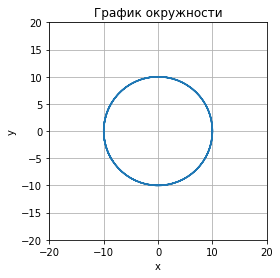

In [31]:
#2.	Напишите код, который будет рисовать график окружности в полярных координатах.
R = 10
x=np.linspace(-R,R,201)
#рисуем в полярных координатах
plt.plot(R*np.cos(x), R*np.sin(x))
plt.axes().set_aspect(1)
plt.title("График окружности")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-R*2,R*2)
plt.ylim(-R*2,R*2)
plt.grid(True)
plt.show()

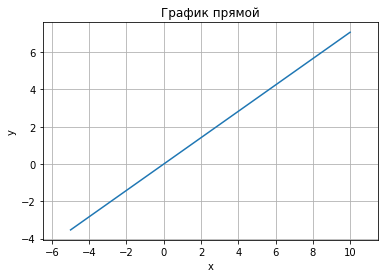

In [66]:
#3.	Напишите код, который будет рисовать график отрезка прямой линии в полярных координатах.
a = -5
b = 10
alpha = 45
x=np.linspace(a,b,201)
#рисуем в полярных координатах
plt.plot(x, x*np.sin(alpha*np.pi/180))
plt.axes().set_aspect(1)
plt.title("График прямой")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(a*2,b*2)
plt.grid(True)
plt.axis('equal')
plt.show()

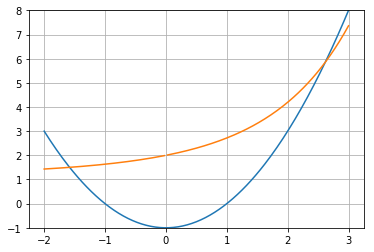

In [73]:
#4. Задание (в программе)
#1)	Решите систему уравнений:
#y = x2 – 1
#exp(x) + x∙(1 – y) = 1
x=np.linspace(-2,3,201)
plt.plot(x,x**2-1)
plt.plot(x,(np.exp(x)+x-1)/x)
plt.xlabel=('x')
plt.xlabel=('y')
plt.ylim(-1, 8)
plt.grid(True)
plt.show()

In [78]:
def equations(p):
    x,y=p
    return (y-x**2+1, np.exp(x)+x*(1-y)-1)

x1,y1=fsolve(equations, (2,3))
print(x1,y1)
x1,y1=fsolve(equations, (-1.5,1.5))
print(x1,y1)

2.618145573085453 5.854686241866956
-1.5818353528795808 1.5022030836160143


In [81]:
#2)	Решите систему уравнений и неравенств:
#y = x2 – 1
#exp(x) + x∙(1 – y) > 1
def equations2(p):
    x,y=p
    return (y-x**2+1, np.exp(x)+x*(1-y)-1)

x1,y1=fsolve(equations2, (2,3))
x2,y2=fsolve(equations2, (-1.5,1.5))
print(np.amin([x1,x2]),'< x < ',np.amax([x1,x2]))

-1.5818353528795808 < x <  2.618145573085453
